### Clustering the data
K-means clusters work by initialising the centroids of the data and then categorise the data by some measure of distance (e.g. Eucledian). The backside of this clustering algorithm is that we must assume number of clusters a priori, but then we can check the measure of goodness of various solutions (i.e. k-number of clusters), comapring variance between clasters and within clasters. The bigger the ratio in favor of huge variance between clusters, solution is better. This relatively simple analysis could give very important business value insights in terms of better understaning the charachteristics and typology of the some pheonomena (e.g. customers, products, etc.) 

In [13]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D

iris = datasets.load_iris()

In [2]:
df = iris['data']
target = iris['target']

In [3]:
import pandas as pd
df = pd.DataFrame(df, columns = ['sepal length (cm)',
  'sepal width (cm)',
  'petal length (cm)',
  'petal width (cm)'])
target = pd.DataFrame(target, columns=['type of flower'])
df = pd.merge(df, target, how = 'inner', left_index = True, right_index=True)

In [5]:
#we will try sollution with two clusters
km = KMeans(n_clusters=2, 
            init='random', 
            n_init=10, 
            max_iter=300,
            tol=1e-04,
            random_state=0)
y_km = km.fit_predict(df.iloc[:,0:3])
y_km = pd.DataFrame(y_km, columns=['two_clasters_solution'])
df = pd.merge(df, y_km, how = 'inner', left_index = True, right_index=True)

# and then with three
km_3 = KMeans(n_clusters=3, 
            init='random', 
            n_init=10, 
            max_iter=300,
            tol=1e-04,
            random_state=0)

y_km_3 = km_3.fit_predict(df.iloc[:,0:3])
y_km_3 = pd.DataFrame(y_km_3, columns=['three_clasters_solution'])
df = pd.merge(df, y_km_3, how = 'inner', left_index = True, right_index=True)

In [9]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),type of flower,two_clasters_solution,thre_clasters_solution
0,5.1,3.5,1.4,0.2,0,1,2
1,4.9,3.0,1.4,0.2,0,1,2
2,4.7,3.2,1.3,0.2,0,1,2
3,4.6,3.1,1.5,0.2,0,1,2
4,5.0,3.6,1.4,0.2,0,1,2


In [27]:
iris['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [97]:
setosa = df[df['type of flower']==0]
versicolor = df[df['type of flower']==1]
virginica = df[df['type of flower']==2]

cluster_two_1 = df[df['two_clasters_solution']==0]
cluster_two_2 = df[df['two_clasters_solution']==1]

cluster_three_1 = df[df['three_clasters_solution']==0]
cluster_three_2 = df[df['three_clasters_solution']==1]
cluster_three_3 = df[df['three_clasters_solution']==2]

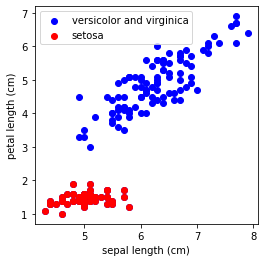

In [30]:
#ground throuth
plt.figure(figsize=(4,4))
plt.scatter(df['sepal length (cm)'], df['petal length (cm)'], color='blue', label ='versicolor and virginica')
plt.scatter(df[df['type of flower']==0]['sepal length (cm)'], df[df['type of flower']==0]['petal length (cm)'], color='red', marker ='o', label='setosa')
plt.xlabel('sepal length (cm)')
plt.ylabel('petal length (cm)')
plt.legend();

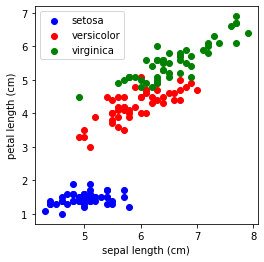

In [32]:
#ground throuth
plt.figure(figsize=(4,4))
plt.scatter(setosa['sepal length (cm)'], setosa['petal length (cm)'], color='blue', label ='setosa')
plt.scatter(versicolor['sepal length (cm)'], versicolor['petal length (cm)'], color='red', label ='versicolor')
plt.scatter(virginica['sepal length (cm)'], virginica['petal length (cm)'], color='green', label ='virginica')
plt.xlabel('sepal length (cm)')
plt.ylabel('petal length (cm)')
plt.legend();

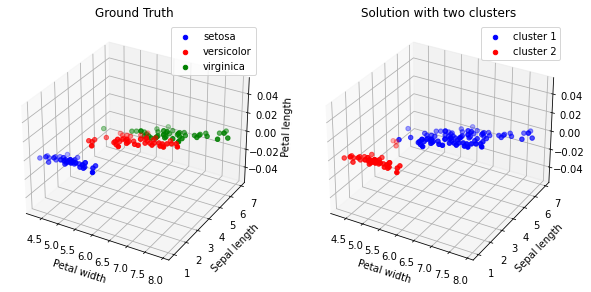

In [96]:
# ground throuth in three dimensions

fig = plt.figure(figsize=(10,10))

#first subplot
ax1 = fig.add_subplot(1,2,1, projection='3d')


ax1.scatter(setosa['sepal length (cm)'], setosa['petal length (cm)'], color='blue', label ='setosa')
ax1.scatter(versicolor['sepal length (cm)'], versicolor['petal length (cm)'], color='red', label ='versicolor')
ax1.scatter(virginica['sepal length (cm)'], virginica['petal length (cm)'], color='green', label ='virginica')
ax1.set_xlabel('Petal width')
ax1.set_ylabel('Sepal length')
ax1.set_zlabel('Petal length')
ax1.legend()
ax1.set_title('Ground Truth')

#second subplot

ax1 = fig.add_subplot(1,2,2, projection='3d')
ax1.scatter(cluster_two_1['sepal length (cm)'], cluster_two_1['petal length (cm)'], color='blue', label ='cluster 1')
ax1.scatter(cluster_two_2['sepal length (cm)'], cluster_two_2['petal length (cm)'], color='red', label ='cluster 2')
ax1.set_xlabel('Petal width')
ax1.set_ylabel('Sepal length')
ax1.legend()
ax1.set_title('Solution with two clusters');


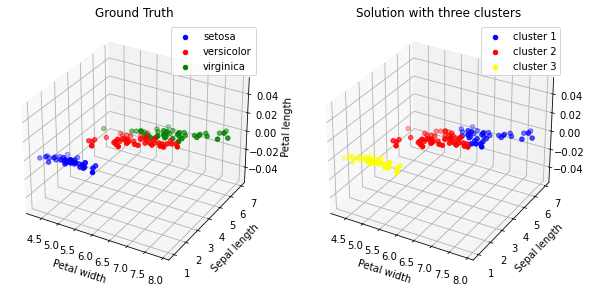

In [98]:
# ground throuth in three dimensions

fig = plt.figure(figsize=(10,10))

#first subplot
ax1 = fig.add_subplot(1,2,1, projection='3d')


ax1.scatter(setosa['sepal length (cm)'], setosa['petal length (cm)'], color='blue', label ='setosa')
ax1.scatter(versicolor['sepal length (cm)'], versicolor['petal length (cm)'], color='red', label ='versicolor')
ax1.scatter(virginica['sepal length (cm)'], virginica['petal length (cm)'], color='green', label ='virginica')
ax1.set_xlabel('Petal width')
ax1.set_ylabel('Sepal length')
ax1.set_zlabel('Petal length')
ax1.legend()
ax1.set_title('Ground Truth')

#second subplot

ax1 = fig.add_subplot(1,2,2, projection='3d')
ax1.scatter(cluster_three_1['sepal length (cm)'], cluster_three_1['petal length (cm)'], color='blue', label ='cluster 1')
ax1.scatter(cluster_three_2['sepal length (cm)'], cluster_three_2['petal length (cm)'], color='red', label ='cluster 2')
ax1.scatter(cluster_three_3['sepal length (cm)'], cluster_three_3['petal length (cm)'], color='yellow', label ='cluster 3')
ax1.set_xlabel('Petal width')
ax1.set_ylabel('Sepal length')
ax1.legend()
ax1.set_title('Solution with three clusters');


distortion for 1 clusters: 594.8006666666665
distortion for 2 clusters: 133.46431822602608
distortion for 3 clusters: 69.42973924466338
distortion for 4 clusters: 49.437815584415574
distortion for 5 clusters: 40.45343908045978
distortion for 6 clusters: 33.00220043290045
distortion for 7 clusters: 29.180641858141872
distortion for 8 clusters: 25.476771645021646
distortion for 9 clusters: 23.890789321789324
distortion for 10 clusters: 21.720528183737258


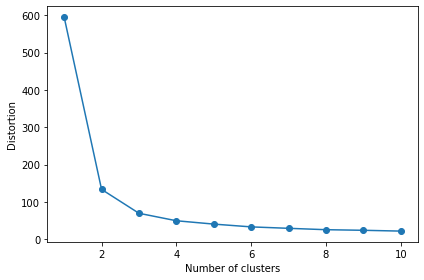

In [103]:
#we see that the best solution is solution with three clusters
distortions = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, 
                init='k-means++', 
                n_init=10, 
                max_iter=300, 
                random_state=0)
    km.fit(df.iloc[:,0:3])
    distortions.append(km.inertia_)
    print(f'distortion for {i} clusters:', km.inertia_)
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.tight_layout()
#plt.savefig('./figures/elbow.png', dpi=300)
plt.show()